In [14]:
event_signatures = {
    'Transfer': 'Transfer(address,address,uint256)',
    'Approval': 'Approval(address,address,uint256)',
    'Deposit': 'AddLiquidity(address,uint256,uint256)',
    'Withdraw': 'RemoveLiquidity(address,uint256,uint256)'
}

events_hashes = {
    'ddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef': 'Transfer', 
    'e1fffcc4923d04b559f4d29a8bfc6cda04eb5b0d3c460751c2402c5c5cc9109c': 'Deposit',
    '4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c6fef26394f4c03821c4f': 'Mint',
    '1c411e9a96e071241c2f21f7726b17ae89e3cab4c78be50e062b03a9fffbbad1': 'Sync',
    'd78ad95fa46c994b6551d0da85fc275fe613ce37657fb8d5e3d130840159d822': 'Swap',
    '8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925': 'Approval',
    '0d3648bd0f6ba80134a33ba9275ac585d9d315f0ad8355cddefde31afa28d0e9': 'PairCreated',
    'dccd412f0b1252819cb1fd330b93224ca42612892bb3f4f789976e6d81936496': 'Burn',
    '7fcf532c15f0a6db0bd6d0e038bea71d30d808c7d98cb3bf7268a95bf5081b65': 'Withdrawal'
}

contracts = {'0x2350A783EFEB9322631f6b87fDeBEb1852AD346D'.lower() : 'KWH'}

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [10]:
merged = pd.read_csv('merged.csv')

In [27]:
merged['contract'] = merged['address'].apply(lambda x: contracts[x])
merged['event'] = merged['topics'].str.split(',').apply(lambda x: events_hashes[x[0][2:]])
merged = merged.sort_values(['block_number','transaction_index']).reset_index(drop=True)
merged.head(10)

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,transaction_sender,to_address,value,gas,gas_price,input,block_timestamp,contract,event
0,3339,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,5000000000000000000,3020568,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Transfer
1,3340,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,5000000000000000000,3020568,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Transfer
2,3341,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,5000000000000000000,3020568,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Sync
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,5000000000000000000,3020568,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Mint
4,3496,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,199317,2000000000,0x18cbafe5000000000000000000000000000000000000...,1605016476,KWH,Sync
5,3497,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,199317,2000000000,0x18cbafe5000000000000000000000000000000000000...,1605016476,KWH,Swap
6,3150,0x090afedec4818e9a1d84810c7729e043cbf3e703fbe4...,1,0x610c3270d3784b2f1075ef24ff1600568fe2d773e24c...,3729731,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x090afedec4818e9a1d84810c7729e043cbf3e703fbe4...,4,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,100000000000000000,198638,1000000000,0xf305d71900000000000000000000000078b57c213a18...,1605018276,KWH,Transfer
7,3151,0x090afedec4818e9a1d84810c7729e043cbf3e703fbe4...,1,0x610c3270d3784b2f1075ef24ff1600568fe2d773e24c...,3729731,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x090afedec4818e9a1d84810c7729

In [28]:
events = merged

In [29]:
print('Block range: ' + str(events.block_number.min()) + ' to ' + str(events.block_number.max()))

Block range: 3729595 to 3755307


In [31]:
events.groupby(['contract','event']).transaction_hash.count()

contract  event   
KWH       Mint         11
          Swap        354
          Sync        365
          Transfer     12
Name: transaction_hash, dtype: int64

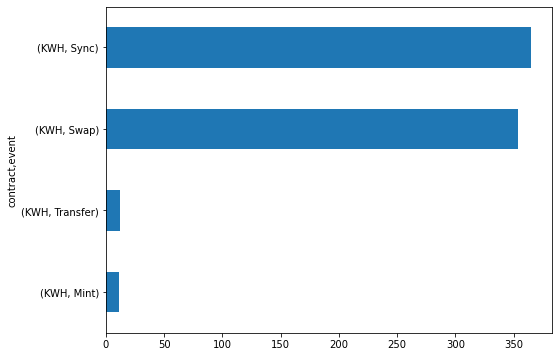

In [32]:
event_counts = events.groupby(['contract','event']).transaction_hash.count()
event_counts.sort_values().plot(kind='barh', figsize=(8, 6))

In [33]:
event_counts_df = event_counts.reset_index()
event_counts_df.columns = ['contract', 'event', 'count']
event_counts_df

,contract,event,count
0,KWH,Mint,11
1,KWH,Swap,354
2,KWH,Sync,365
3,KWH,Transfer,12


In [34]:
events['contract_event'] = events['contract'] + events['event']
events['block_group'] = events['block_number'].apply(lambda x: int(x/10000))

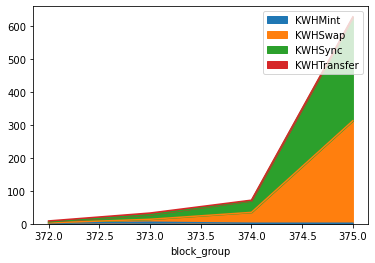

In [39]:
areaplot = events.groupby(['block_group','contract_event']).transaction_hash.count().reset_index().pivot(index='block_group', columns='contract_event', values='transaction_hash')#.plot.area()
areaplot.plot.area()
plt.legend(loc=1)

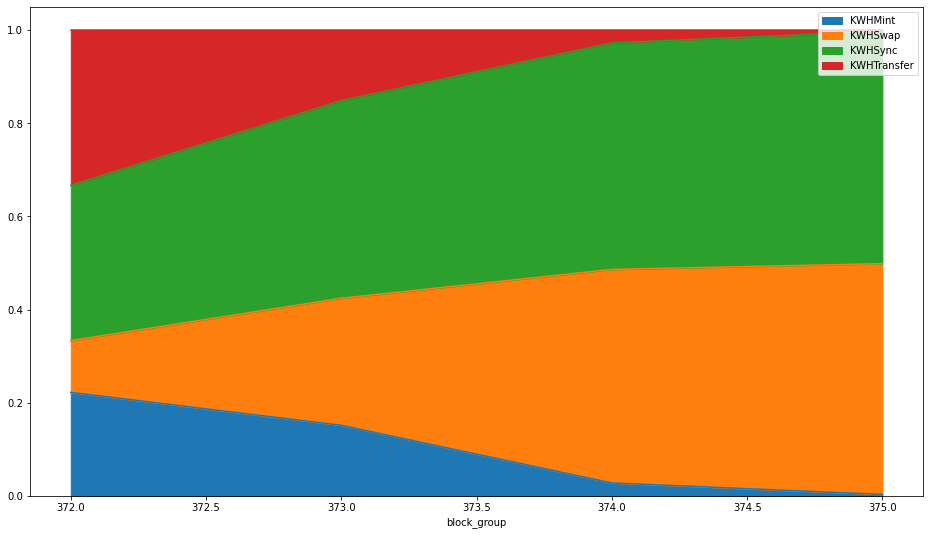

In [40]:
areaplot.divide(areaplot.sum(axis=1), axis=0).plot.area(figsize=(16, 9))
plt.legend(loc=1)

In [64]:
events['agent'] = events['transaction_sender']

In [147]:
events['topics'][0:10].str.split(',')

0    [0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...
1    [0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...
2    [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...
3    [0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1...
4    [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...
5    [0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...
6    [0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...
7    [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...
8    [0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1...
9    [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...
Name: topics, dtype: object

In [124]:
def getUNIDeltaFromTopics(topics):
    event_hash = topics[0][2:]
    if events_hashes[event_hash] == 'Transfer':
        if topics[1] == '0x0000000000000000000000000000000000000000000000000000000000000000':
            return 1
        if topics[2] == '0x0000000000000000000000000000000000000000000000000000000000000000':
            return -1
    return 0

In [126]:
events['uni_delta'] = events['data'].apply(lambda x: 0 if x == '0x' else int(x,16))
events['uni_delta'] = events['uni_delta'] * events['topics'].str.split(',').apply(getUNIDeltaFromTopics)

In [127]:
events['uni_delta']

0                       1000
1      223606797749978968640
2                          0
3                          0
4                          0
               ...          
737                        0
738                        0
739                        0
740                        0
741                        0
Name: uni_delta, Length: 742, dtype: object

In [128]:
events['UNI_supply'] = events['uni_delta'].cumsum()

In [129]:
events['UNI_supply']

0                       1000
1      223606797749978969640
2      223606797749978969640
3      223606797749978969640
4      223606797749978969640
               ...          
737    473390301390290926934
738    473390301390290926934
739    473390301390290926934
740    473390301390290926934
741    473390301390290926934
Name: UNI_supply, Length: 742, dtype: object

In [79]:
swaps = events[events['event']=='Swap']

In [100]:
swaps['KWH_in'] = swaps['data'].apply(lambda x: int(x[2:66],16))

<ipython-input-100-4bba7e9e2d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps['KWH_in'] = swaps['data'].apply(lambda x: int(x[2:66],16))


In [101]:
swaps['KWH_in'][5]

100000000000000000000

In [104]:
swaps['ETH_in'] = swaps['data'].apply(lambda x: int(x[67:131],16))

<ipython-input-104-704d78388f65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps['ETH_in'] = swaps['data'].apply(lambda x: int(x[67:131],16))


In [105]:
swaps['ETH_in'][5]

0

In [106]:
swaps['KWH_out'] = swaps['data'].apply(lambda x: int(x[132:196],16))

<ipython-input-106-813f9c900b1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps['KWH_out'] = swaps['data'].apply(lambda x: int(x[132:196],16))


In [107]:
swaps['KWH_out'][5]

0

In [110]:
swaps['ETH_out'] = swaps['data'].apply(lambda x: int(x[197:],16))

<ipython-input-110-25c180b59526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps['ETH_out'] = swaps['data'].apply(lambda x: int(x[197:],16))


In [112]:
swaps['ETH_out'][5]

49357901719853064

In [113]:
mints = events[events['event']=='Mint']

In [114]:
mints.head()

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,value,gas,gas_price,input,block_timestamp,contract,event,contract_event,block_group,agent
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,5000000000000000000,3020568,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Mint,KWHMint,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0
8,3152,0x090afedec4818e9a1d84810c7729e043cbf3e703fbe4...,1,0x610c3270d3784b2f1075ef24ff1600568fe2d773e24c...,3729731,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x090afedec4818e9a1d84810c7729e043cbf3e703fbe4...,4,...,100000000000000000,198638,1000000000,0xf305d71900000000000000000000000078b57c213a18...,1605018276,KWH,Mint,KWHMint,372,0xfe594e862c3ce76e192997eabfc41afd7c975b52
21,47185,0x2b24707dc22fc9b3167b2bc13659baca46136758fa33...,0,0x406a0f5c56ce769572249f87b9353485998bbc4d0762...,3736632,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x2b24707dc22fc9b3167b2bc13659baca46136758fa33...,103,...,1000000000000000,288710,1000000000,0xc26974200000000000000000000000002a40019abd4a...,1605121793,KWH,Mint,KWHMint,373,0x2a40019abd4a61d71abb73968bab068ab389a636
26,47252,0xdc76d9136ab14255328cde0e940c315dc26ed7fa9c8f...,0,0xfe3474860a3f32d6c5e24f2a79218e2544381d43132f...,3736634,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0xdc76d9136ab14255328cde0e940c315dc26ed7fa9c8f...,8,...,200000000000000000,353578,50000000000,0x,1605121823,KWH,Mint,KWHMint,373,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0
31,48207,0x6259fb1fc5adfc60bbc3de98610cba58b310c43fc3fc...,0,0x38d51aef4d969b947e77d0814cd7682b6f8dd989bc62...,3736734,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x6259fb1fc5adfc60bbc3de98610cba58b310c43fc3fc...,19,...,100000000000000000,3716020,50000000000,0x,1605123323,KWH,Mint,KWHMint,373,0xfe594e862c3ce76e192997eabfc41afd7c975b52


In [116]:
mints[mints['transaction_hash'] == '0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef09052068b9c37ab14e6cec2']['data']

3    0x00000000000000000000000000000000000000000000...
Name: data, dtype: object

In [119]:
mints['KWH'] = mints['data'].apply(lambda x: int(x[2:66],16))

<ipython-input-119-344a9bf86083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mints['KWH'] = mints['data'].apply(lambda x: int(x[2:66],16))


In [120]:
mints['ETH'] = mints['data'].apply(lambda x: int(x[67:],16))

<ipython-input-120-b26bfe945499>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mints['ETH'] = mints['data'].apply(lambda x: int(x[67:],16))


In [121]:
mints['KWH']

3      10000000000000000000000
8        204013939999999999961
21         2863756933215146582
26       538117961768320826736
31       260887513104343239584
36      1128026831078372018680
41      1000000000000000000000
46       104043610557740588494
85     18836245517382820880424
128                      10058
135                 1005907079
Name: KWH, dtype: object

In [122]:
mints['ETH']

3      5000000000000000000
8        99999999999999999
21         498582762039023
26      100000000000000000
31       50000000000000000
36      250000000000000000
41        4787042781935517
46         498940493116014
85     2500000000000000000
128                      4
135                 498499
Name: ETH, dtype: int64

In [130]:
events

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,gas_price,input,block_timestamp,contract,event,contract_event,block_group,agent,uni_delta,UNI_supply
0,3339,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Transfer,KWHTransfer,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,1000,1000
1,3340,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Transfer,KWHTransfer,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,223606797749978968640,223606797749978969640
2,3341,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Sync,KWHSync,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,2000000000,0xf305d71900000000000000000000000078b57c213a18...,1605016236,KWH,Mint,KWHMint,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640
4,3496,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,...,2000000000,0x18cbafe5000000000000000000000000000000000000...,1605016476,KWH,Sync,KWHSync,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,269989,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,1,0xdc883fc4704543ba86dbf3aa8ca424a1b834e5ddbdce...,3755305,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,339,...,1230000000,0x7ff36ab5000000000000000000000000000000000000...,1605401905,KWH,Swap,KWHSwap,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,473390301390290926934
738,269995,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,1230000000,0x18cbafe5000000000000000000000000000000000000...,1605401935,KWH,Sync,KWHSync,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,473390301390290926934
739,269996,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,1230000000,0x18cb

In [131]:
swaps

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,block_timestamp,contract,event,contract_event,block_group,agent,KWH_in,ETH_in,KWH_out,ETH_out
5,3497,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,...,1605016476,KWH,Swap,KWHSwap,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,100000000000000000000,0,0,49357901719853064
10,6306,0x74dfe81693420dcbb3105deadcc5984df9e58a4d9e10...,3,0xc3485039babb14f320b086ce75c42dd073e33e358c9c...,3730250,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x74dfe81693420dcbb3105deadcc5984df9e58a4d9e10...,5,...,1605026061,KWH,Swap,KWHSwap,373,0xfe594e862c3ce76e192997eabfc41afd7c975b52,1000000000000000000000,0,0,445578617876238677
12,46501,0x49119d085cc553391c045cc2055e2e848d8cdaa988f9...,9,0x5b11b1c22bdf9ed8badddbb14dfd9dc314a1d27c3c6c...,3736597,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x49119d085cc553391c045cc2055e2e848d8cdaa988f9...,11,...,1605121268,KWH,Swap,KWHSwap,373,0xfe594e862c3ce76e192997eabfc41afd7c975b52,10000,0,0,4
14,47081,0x8c56abcf834e8a05ecf99a8207201808bc67a20c70aa...,3,0x4db101ef65d8445416009fb85dd2b73fbdc359696aa8...,3736605,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x8c56abcf834e8a05ecf99a8207201808bc67a20c70aa...,12,...,1605121388,KWH,Swap,KWHSwap,373,0xfe594e862c3ce76e192997eabfc41afd7c975b52,1000000000000000000000,0,0,373241450855773644
16,47138,0x4250f11e7d85f04f25ad77c0efe550d0849aa4106235...,5,0xff3d54d6edd5d37008b1af05ae85f76b08c5f3f1fef9...,3736613,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x4250f11e7d85f04f25ad77c0efe550d0849aa4106235...,13,...,1605121508,KWH,Swap,KWHSwap,373,0xfe594e862c3ce76e192997eabfc41afd7c975b52,5000000000000000000000,0,0,1220175591882104238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,269955,0xced22e14aa1054afd57766de58c81f2e9be3aad1fbea...,1,0x4923a908ccb2faefa20143907511b63f0ef4d47a1323...,3755304,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xced22e14aa1054afd57766de58c81f2e9be3aad1fbea...,27,...,1605401890,KWH,Swap,KWHSwap,375,0xbc54e1933bbd09e278150d273ffcaa9ef0186c25,3745152000000001536,0,0,335819904315440
735,269981,0xd3a9708470684774fd742dea617f5cc9116ebdc617fa...,25,0x4923a908ccb2faefa20143907511b63f0ef4d47a1323...,3755304,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xd3a9708470684774fd742dea617f5cc9116ebdc617fa...,338,...,1605401890,KWH,Swap,KWHSwap,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,1284879242077512400896,0,0,112480273992766942
737,269989,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,1,0xdc883fc4704543ba86dbf3aa8ca424a1b834e5ddbdce...,3755305,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,339,...,1605401905,KWH,Swap,KWHSwap,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,7771407129655275520,1309624332783190968144896,0
739,269996,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa

In [134]:
events_and_swaps = pd.merge(events, swaps, how='left')

In [135]:
events_and_mints = pd.merge(events_and_swaps, mints, how='left')

In [136]:
events_and_mints

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,block_group,agent,uni_delta,UNI_supply,KWH_in,ETH_in,KWH_out,ETH_out,KWH,ETH
0,3339,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN
1,3340,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,223606797749978968640,223606797749978969640,NaN,NaN,NaN,NaN,NaN,NaN
2,3341,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640,NaN,NaN,NaN,NaN,NaN,NaN
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640,NaN,NaN,NaN,NaN,10000000000000000000000,5.000000e+18
4,3496,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,...,372,0x24aa0566fc4a75a740a0bc5fcb1509d6621932d0,0,223606797749978969640,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,269989,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,1,0xdc883fc4704543ba86dbf3aa8ca424a1b834e5ddbdce...,3755305,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,339,...,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,473390301390290926934,0,7771407129655275520,1309624332783190968144896,0,NaN,NaN
738,269995,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,473390301390290926934,NaN,NaN,NaN,NaN,NaN,NaN
739,269996,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,375,0xfe594e862c3ce76e192997eabfc41afd7c975b52,0,473390301390290926934,1304033446116796661760,0,0,132431010004556306,NaN,NaN
740,270000,0x024a384a4c7b0b9d1f2b9bf5ba3ef9dcfa31a2a716e6...,4,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x024a384a4c7b0b9d1f2b9bf5ba3ef9dcfa31a2a716e6...,341,...,37

In [138]:
events_and_mints = events_and_mints.fillna(0)

In [141]:
events_and_mints['eth_delta'] = events_and_mints['ETH'] + events_and_mints['ETH_in'] - events_and_mints['ETH_out']
events_and_mints['token_delta'] = events_and_mints['KWH'] + events_and_mints['KWH_in'] - events_and_mints['KWH_out']

In [142]:
events_and_mints

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,uni_delta,UNI_supply,KWH_in,ETH_in,KWH_out,ETH_out,KWH,ETH,eth_delta,token_delta
0,3339,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,1000,1000,0,0,0,0,0,0.000000e+00,0,0
1,3340,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,223606797749978968640,223606797749978969640,0,0,0,0,0,0.000000e+00,0,0
2,3341,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,223606797749978969640,0,0,0,0,0,0.000000e+00,0,0
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,223606797749978969640,0,0,0,0,10000000000000000000000,5.000000e+18,5e+18,10000000000000000000000
4,3496,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,...,0,223606797749978969640,0,0,0,0,0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,269989,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,1,0xdc883fc4704543ba86dbf3aa8ca424a1b834e5ddbdce...,3755305,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0x112afdb9376e88855f4abdcce34501593d47459f14d1...,339,...,0,473390301390290926934,0,7771407129655275520,1309624332783190968144896,0,0,0.000000e+00,7.77141e+18,-1309624332783190968144896
738,269995,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,0,473390301390290926934,0,0,0,0,0,0.000000e+00,0,0
739,269996,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,3,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xd78ad95fa46c994b6551d0da85fc275fe613ce37657f...,0xf23c8404b49d1331a5b2fee2fffb0f385922f7ea9f99...,340,...,0,473390301390290926934,1304033446116796661760,0,0,132431010004556306,0,0.000000e+00,-1.32431e+17,1304033446116796661760
740,270000,0x024a384a4c7b0b9d1f2b9bf5ba3ef9dcfa31a2a716e6...,4,0x4bacf86fbe245a8c12d9a5f78fbe3fbf1d7ec0af71ff...,3755307,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x024a384a4c7b0b9d1f2b9bf5ba3ef9dcfa31a2a716e6...,341,...,0,473390301390290926934,0,0,0,0,0,0.000000e+00,0,0


In [145]:
events = events_and_mints

In [146]:
events['eth_balance'] = events['eth_delta'].cumsum()
events['token_balance'] = events['token_delta'].cumsum()

events['invariant'] = events['eth_balance']*events['token_balance']
events.to_pickle('uniswap_events.pickle')
events.head()

,Unnamed: 0,transaction_hash,transaction_index,block_hash,block_number,address,data,topics,hash,nonce,...,ETH_in,KWH_out,ETH_out,KWH,ETH,eth_delta,token_delta,eth_balance,token_balance,invariant
0,3339,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,0,0,0,0.000000e+00,0,0,0,0,0
1,3340,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,0,0,0,0.000000e+00,0,0,0,0,0
2,3341,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,0,0,0,0.000000e+00,0,0,0,0,0
3,3342,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,1,0x3434d2e9af1b53d0d70d5e6891fba366d2dc4892957c...,3729595,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x4c209b5fc8ad50758f13e2e1088ba56a560dff690a1c...,0x3e2ac58fc9fde895797395da9e70bc4df3238c3ef090...,4,...,0,0,0,10000000000000000000000,5.000000e+18,5e+18,10000000000000000000000,5e+18,10000000000000000000000,5e+40
4,3496,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,0,0x56074b2698d9c5daf12fbcee5bf23a17dd341baf89ff...,3729611,0x2350a783efeb9322631f6b87fdebeb1852ad346d,0x00000000000000000000000000000000000000000000...,0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78b...,0xe33677b21392e5cf2ed5667b27198b81d2398345d197...,5,...,0,0,0,0,0.000000e+00,0,0,5e+18,10000000000000000000000,5e+40
